# Problem 4
### (a)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# helper function
def f(x):
    x1, x2 = x[0], x[1]
    f1 = x1**2 + x2**2 - 25
    f2 = x1 - 7*x2 - 25
    return np.array([f1, f2])

def jacobian(x):
    x1, x2 = x[0], x[1]
    J = np.array([[2*x1, 2*x2],
                  [1, -7]])
    return J

# main iteration function
def newton_method(x0, err=1e-8, max_iter=100):
    # true solution
    xi_1 = np.array([4, -3])
    xi_2 = np.array([-3, -4])
    
    x = x0.copy()
    iterates = [x.copy()]
    
    for k in range(max_iter):
        fx = f(x)
        J = jacobian(x)
        
        delta_x = np.linalg.solve(J, fx)
        x = x - delta_x
        
        iterates.append(x.copy())
        
        # checking stopping condition
        if (np.linalg.norm(x - xi_1, ord=np.inf) < err or 
            np.linalg.norm(x - xi_2, ord=np.inf) < err):
            break
    
    return np.array(iterates)

# initialize variables
x0_1 = np.array([0.4, 0.3])
x0_2 = np.array([0.2, -0.4])

# run the iteration
iterates_1 = newton_method(x0_1)
iterates_2 = newton_method(x0_2)

### (b)

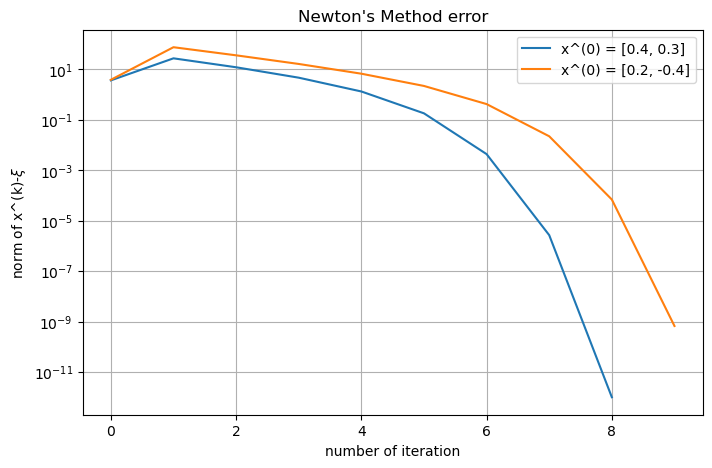

In [ ]:
xi_1 = np.array([4.0, -3.0])
xi_2 = np.array([-3.0, -4.0])

root1 = xi_1 if np.linalg.norm(iterates_1[-1]-xi_1, np.inf) < np.linalg.norm(iterates_1[-1]-xi_2, np.inf) else xi_2
root2 = xi_1 if np.linalg.norm(iterates_2[-1]-xi_1, np.inf) < np.linalg.norm(iterates_2[-1]-xi_2, np.inf) else xi_2


errors_1 = [np.linalg.norm(x - root1, np.inf) for x in iterates_1]
errors_2 = [np.linalg.norm(x - root2, np.inf) for x in iterates_2]


plt.figure(figsize=(8, 5))
plt.semilogy(errors_1, label='x^(0) = [0.4, 0.3]')
plt.semilogy(errors_2, label='x^(0) = [0.2, -0.4]')
plt.legend()
plt.title("Newton's Method error")
plt.xlabel("number of iteration")
plt.ylabel(r"norm of x^(k)-$\xi$")
plt.grid(True)
plt.show()